# Карасов Николай Дмитриевич

# Домашняя работа №1

## Задача

Постройте график относительной погрешности при вычислении $\exp(-x)$ с помощью разложения в ряд Тейлора для подходящего диапазона $x$, $x \geq 0$. Сравните результаты для одинарной и двойной точности.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

## Одинарная точноть

In [2]:
def exp_1(x: float, n: int) -> float:
    return sum([np.float32(x) ** np.float32(k) / np.float32(factorial(k)) for k in range(n + 1)]) ** np.float32(-1)

## Двойная точность

In [3]:
def exp_2(x: float, n: int) -> float:
    return sum([np.float64(x) ** np.float64(k) / np.float64(factorial(k)) for k in range(n + 1)]) ** np.float64(-1)

## Относительная погрешность

In [4]:
def relative_error(true_val: float, find_val: float) -> float:
    return np.abs(true_val - find_val) / true_val

## Какое n брать для каждого случая?

Будем строить графики при $x \in [0, 20]$.

In [1]:
max_value32 = 3.4e38
max_value64 = 1.79e+308

In [6]:
def find_n(max_value: float, max_bound: float) -> int:
    k = 1
    while factorial(k) < max_value and max_bound ** k < max_value:
        k += 1
        
    return k - 1

In [7]:
n1 = find_n(max_value32, 20)
n2 = find_n(max_value64, 20)

print(n1, n2)

29 170


Получили, что для одинарной точности $n_1=29$, а для двойной точности $n_2=170$.

## Построим графики

In [8]:
w, h = 15, 5

In [9]:
x = np.linspace(0, 20, 250)

y1 = exp_1(x, n1)
y2 = exp_2(x, n2)

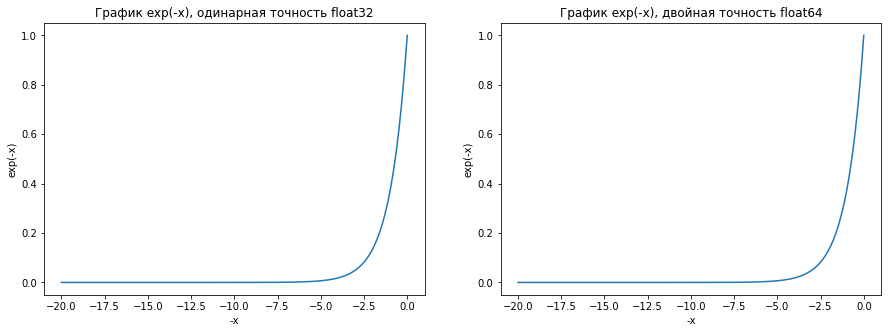

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(w, h))

ax1.plot(-x, y1)
ax1.set_title('График exp(-x), одинарная точность float32')
ax1.set_ylabel('exp(-x)')
ax1.set_xlabel('-x')

ax2.plot(-x, y2)
ax2.set_title('График exp(-x), двойная точность float64')
ax2.set_ylabel('exp(-x)')
ax2.set_xlabel('-x')

plt.show()

Посчитаем относительную погрешность для каждого случая.

In [11]:
y_true = np.exp(-x)

err1 = relative_error(y_true, y1)
err2 = relative_error(y_true, y2)

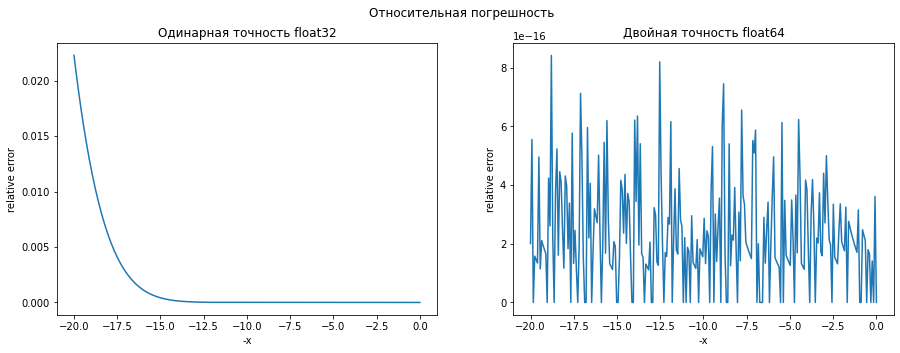

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(w, h))
plt.suptitle('Относительная погрешность')

ax1.plot(-x, err1)
ax1.set_title('Одинарная точность float32')
ax1.set_ylabel('relative error')
ax1.set_xlabel('-x')

ax2.plot(-x, err2)
ax2.set_title('Двойная точность float64')
ax2.set_ylabel('relative error')
ax2.set_xlabel('-x')

plt.show()

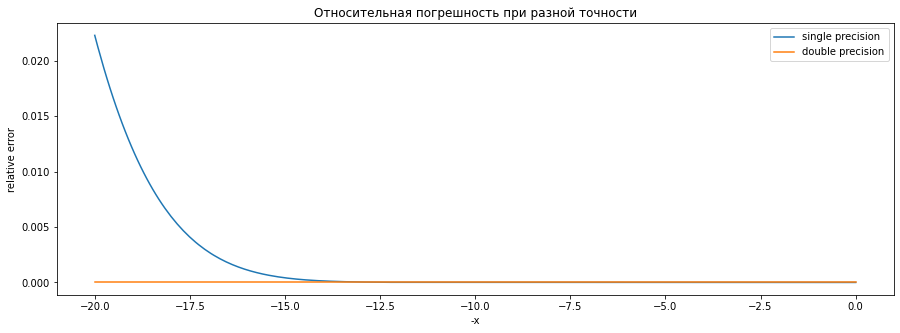

In [13]:
plt.figure(figsize=(w, h))
plt.plot(-x, err1, label='single precision')
plt.plot(-x, err2, label='double precision')
plt.ylabel('relative error')
plt.xlabel('-x')
plt.legend()
plt.title('Относительная погрешность при разной точности')

plt.show()

Как видим из графиков, построенных выше, использование двойной точности при вычислении экспоненты, дает более точные результаты, чем использование одинарной точности. Особенно это становится заметно с увеличением значения $x$.